# Filter by size
## 10/11/22

Script to filter annotated data by size and symlink to a new directory for model training. 

author: E. Orenstein (eorenstein@mbari.org)

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from shutil import copy

Define desired parent directory, output directory, camera resolution, and size threshold.

In [9]:
src_parent = r'D:\spc_annotations_101122'
out_parent = r'D:\model_training_101122\greater_70um_all_concept_101122'
size_thresh = 70

Read in the DataFrame with all fine names, concepts, and morphological parameters from the source directory.

In [6]:
df = pd.read_csv(os.path.join(src_parent, 'img_features.csv'), index_col=[0])

Visualize what the cutoff will do

Text(0.5, 1.0, 'copepods')

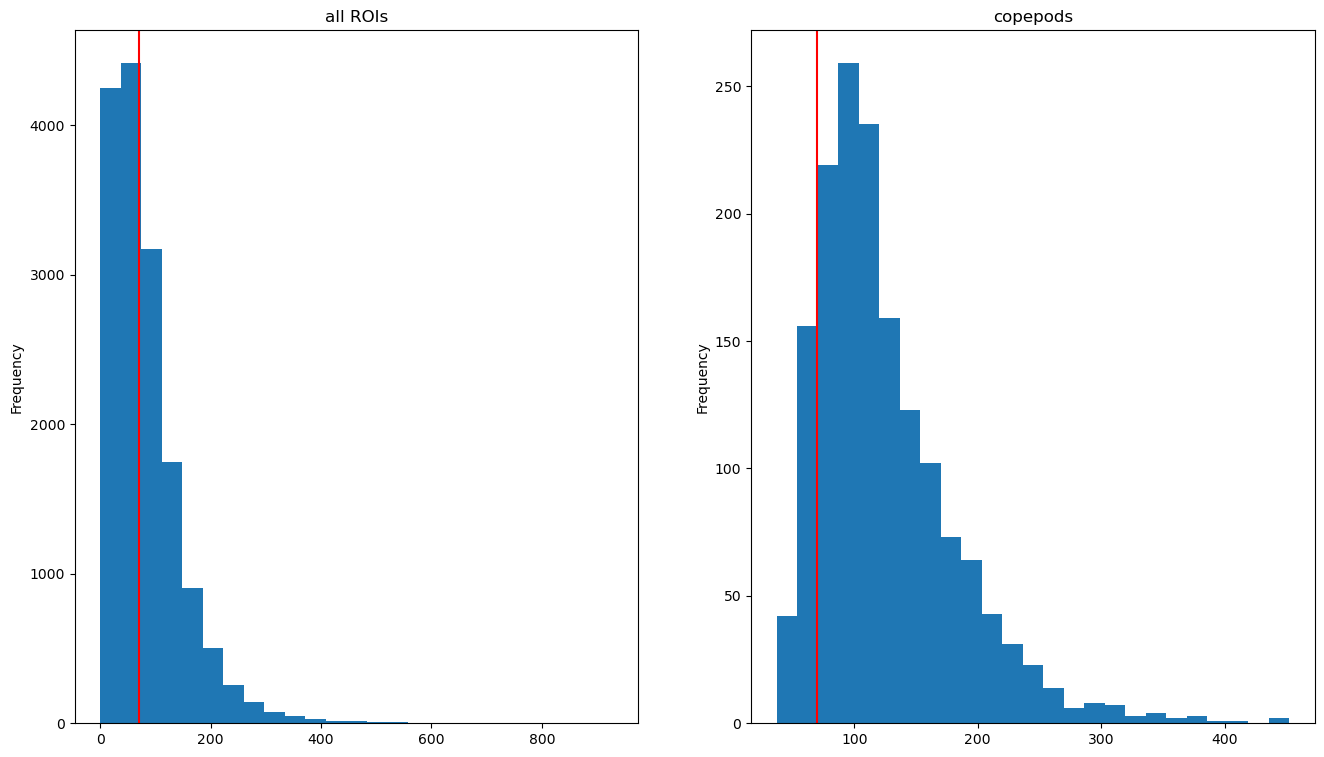

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16,9))
df['major_axis_length'].plot(kind='hist', bins=25, ax=axs[0])
axs[0].axvline(size_thresh, 0, 1, color='r')
axs[0].set_title('all ROIs')
df[df['concept'] == 'copepoda']['major_axis_length'].plot(kind='hist', bins=25, ax=axs[1])
axs[1].axvline(size_thresh, 0, 1, color='r')
axs[1].set_title('copepods')

Slice by size. 

In [16]:
tmp = df[df['major_axis_length'] > size_thresh].copy()
tmp.groupby('concept')['timestamp'].count()

concept
Cnidaria                              59
Diatoms_round_chains                 443
Diatoms_single_cells                 723
Diatoms_spirals                      579
Diatoms_straight_chains              627
Marine_snow_POC                      245
Nauplii                               19
Plankton_all_other_taxa_combined     279
Protozoans                           888
Small_disk                             5
Spiny_triangle                         7
Tunicates                           1059
ceratium                              65
chaetoceros                          717
copepoda                            1385
mollusca                             205
planulae                              11
Name: timestamp, dtype: int64

In [17]:
cop = zip(tmp['concept'].to_list(), tmp.index.to_list())

In [18]:
for con, basename in cop:
    src_ptf = os.path.join(src_parent, con, basename)
    out_path = os.path.join(out_parent, con)
    out_ptf = os.path.join(out_path, basename)

    if not os.path.exists(out_path):
        os.mkdir(out_path)

    copy(src_ptf, out_ptf)